# Example calculations with scalar quantities: sea surface height

## Objectives

To demonstrate basic calculations using scalar fields (e.g., SSH, T, S) from the state estimate including: time series of mean quantities, spatial patterns of mean quantities, and spatial patterns of linear trends.

## Introduction

We will demonstrate global calculations with SSH (global mean sea level time series, mean dynamic topography, global mean sea level trend).

In [1]:
import numpy as np # numerical python
import xarray as xr # for handling multi-dimensional arrays
import matplotlib.pyplot as plt # for plotting
import ecco_v4_py as ecco # for ECCO analysis and plotting

import warnings 
warnings.filterwarnings('ignore') # to remove warning messages

# Load dataset from cloud

Load the ECCO version 4 data from the cloud. The code to load this dataset from the cloud can be found in the [Pangeo Data Catalog](https://catalog.pangeo.io/browse/master/).

In [2]:
import intake
cat = intake.open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/ocean.yaml")
ecco_monthly_ds = cat.ECCOv4r3.to_dask()
ecco_monthly_ds

<xarray.Dataset>
Dimensions:    (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 288, time_snp: 287)
Coordinates:
    Depth      (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC     (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF     (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    XC         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Z          (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zl         (k_l) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zp1        (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    Zu         (k_u) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    drC        (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    drF        (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    dxC        (face, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dxG        (face, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dyC        (face, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dyG        (face, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    hFacC      (k, face, j, i) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
    hFacS      (k, face, j_g, i) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
    hFacW      (k, face, j, i_g) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    iter       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    iter_snp   (time_snp) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    rA         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAs        (face, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAw        (face, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAz        (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * time       (time) datetime64[ns] 1992-01-15 1992-02-13 ... 2015-12-14
  * time_snp   (time_snp) datetime64[ns] 1992-02-01 1992-03-01 ... 2015-12-01
Data variables:
    ADVr_SLT   (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH    (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT   (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH    (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT   (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFrE_SLT   (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFrE_TH    (time, k_l, face, j, i) float32 das

Let's say that we are only intereted in the time frame from 1993-2015 (so cutting off the first year). We do this by using xarray's `.sel()` function.

In [3]:
ecco_monthly_ds = ecco_monthly_ds.sel(time=slice('1993','2018'),time_snp=slice('1993','2015')) # select years 1993-2018
ecco_monthly_ds

<xarray.Dataset>
Dimensions:    (face: 13, i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, time: 276, time_snp: 276)
Coordinates:
    Depth      (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC     (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF     (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    XC         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Z          (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zl         (k_l) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zp1        (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    Zu         (k_u) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    drC        (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    drF        (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    dxC        (face, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dxG        (face, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dyC        (face, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dyG        (face, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * face       (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    hFacC      (k, face, j, i) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
    hFacS      (k, face, j_g, i) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
    hFacW      (k, face, j, i_g) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    iter       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    iter_snp   (time_snp) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    rA         (face, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAs        (face, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAw        (face, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAz        (face, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * time       (time) datetime64[ns] 1993-01-15 1993-02-12 ... 2015-12-14
  * time_snp   (time_snp) datetime64[ns] 1993-01-01 1993-02-01 ... 2015-12-01
Data variables:
    ADVr_SLT   (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH    (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT   (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH    (time, k, face, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT   (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, face, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFrE_SLT   (time, k_l, face, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFrE_TH    (time, k_l, face, j, i) float32 das

Rename the coordinate and dimension from `face` (name on cloud dataset) to `tile` (name expected in `ecco_v4_py`).

In [4]:
ecco_monthly_ds = ecco_monthly_ds.rename({'face':'tile'})
ecco_monthly_ds

<xarray.Dataset>
Dimensions:    (i: 90, i_g: 90, j: 90, j_g: 90, k: 50, k_l: 50, k_p1: 51, k_u: 50, tile: 13, time: 276, time_snp: 276)
Coordinates:
    Depth      (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC     (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF     (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    XC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XG         (tile, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YG         (tile, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Z          (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zl         (k_l) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    Zp1        (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    Zu         (k_u) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    drC        (k_p1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    drF        (k) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    dxC        (tile, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dxG        (tile, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dyC        (tile, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    dyG        (tile, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * tile       (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    hFacC      (k, tile, j, i) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
    hFacS      (k, tile, j_g, i) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
    hFacW      (k, tile, j, i_g) float32 dask.array<chunksize=(50, 13, 90, 90), meta=np.ndarray>
  * i          (i) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * i_g        (i_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
    iter       (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    iter_snp   (time_snp) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * j          (j) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * j_g        (j_g) int64 0 1 2 3 4 5 6 7 8 9 ... 80 81 82 83 84 85 86 87 88 89
  * k          (k) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_l        (k_l) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
  * k_p1       (k_p1) int64 0 1 2 3 4 5 6 7 8 9 ... 42 43 44 45 46 47 48 49 50
  * k_u        (k_u) int64 0 1 2 3 4 5 6 7 8 9 ... 40 41 42 43 44 45 46 47 48 49
    rA         (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAs        (tile, j_g, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAw        (tile, j, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAz        (tile, j_g, i_g) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * time       (time) datetime64[ns] 1993-01-15 1993-02-12 ... 2015-12-14
  * time_snp   (time_snp) datetime64[ns] 1993-01-01 1993-02-01 ... 2015-12-01
Data variables:
    ADVr_SLT   (time, k_l, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH    (time, k_l, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT   (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH    (time, k, tile, j, i_g) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT   (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH    (time, k, tile, j_g, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFrE_SLT   (time, k_l, tile, j, i) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    DFrE_TH    (time, k_l, tile, j, i) float32 das

## Sea surface height

### Global mean sea level

Global mean sea surface height at time $t$ is defined as follows:

$$SSH_{\text{global mean}}(t) = \frac{\sum_{i} SSH(i,t) \,\, A(i)}{A_{\text{global ocean}}}$$

$$A_{\text{global ocean}} = \sum_{i} A(i)$$

Where $SSH(i,t)$ is dynamic height at model grid cell $i$ and time $t$, $A(i)$ is the area (m^2) of model grid cell $i$

#### Part 1: $A_{\text{global ocean}}$

Let's start on the simplest quantity, the global ocean surface area $A_{\text{global ocean}}$.  Our calculation uses *SSH* which is a 'c' point variable.  The surface area of tracer grid cells is provided by the model grid parameter *rA*.  *rA* is a two-dimensional field that is defined over all model grid points, including land.  

To calculate the total ocean surface area we need to ignore the area contributions from land. 

We will first construct a 3D mask that is True for model grid cells that are wet and False for model grid cells that are dry cells.  

In [6]:
# ocean_mask is ceiling of hFacC which is 0 for 100% dry cells and
# 0 > hFacC >= 1 for grid cells that are at least partially wet

# hFacC is the fraction of the thickness (h) of the grid cell which
# is wet.  we'll consider all hFacC > 0 as being a wet grid cell
# and so we use .where() to set all hFacC values that are not > 0 to NaN

# make mask of all points that are (at least some fraction) wet
ocean_mask = ecco_monthly_ds.hFacC.isel(k=0).where(ecco_monthly_ds.hFacC.isel(k=0)>0) # take only the surface layer (k=0)
ocean_mask

<xarray.DataArray 'hFacC' (tile: 13, j: 90, i: 90)>
dask.array<where, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
    Depth    (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC   float32 dask.array<chunksize=(), meta=np.ndarray>
    XC       (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC       (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Z        float32 dask.array<chunksize=(), meta=np.ndarray>
    drF      float32 dask.array<chunksize=(), meta=np.ndarray>
  * tile     (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    hFacC    (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    k        int64 0
    rA       (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
Attributes:
    long_name:      vertical fraction of open cell
    standard_name:  cell_vertical_fraction

Text(0.5, 0.98, 'Wet (1) /dry (0) mask for k=0,   z=-5.0m')

<Figure size 1080x450 with 0 Axes>

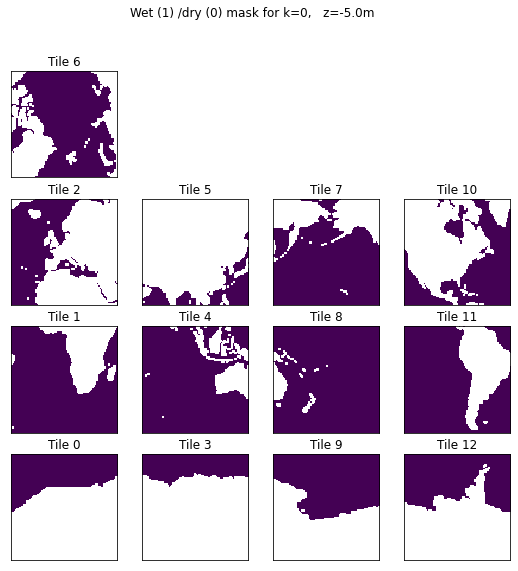

In [7]:
plt.figure(figsize=(12,5), dpi= 90)

ecco.plot_tiles(ocean_mask,layout='latlon', rotate_to_latlon=True)

# select out the model depth at surface, round the number and convert to string.
z = str((np.round(ecco_monthly_ds.Z.values[0])))
plt.suptitle('Wet (1) /dry (0) mask for k=' + str(0) + ',   z=' + z + 'm')

To calculate $A_{\text{global ocean}}$ we must apply the surface wet/dry mask to $rA$.  

In [8]:
# Multiply rA by the ocean mask. Since we only want ocean area, we only need the top k level of ocean_mask.
total_ocean_area = (ecco_monthly_ds.rA*ocean_mask).sum()
 
# Three alternative ways of printing the result
print ('total ocean surface area ( m^2) %d  ' % total_ocean_area.values)
print ('total ocean surface area (km^2) %d ' % (total_ocean_area.values/1.0e6))
print ('total ocean surface area (km^2) %.2E' % (total_ocean_area.values/1.0e6)) # scientific notation with 2 decimal points

total ocean surface area ( m^2) 358013844062208  
total ocean surface area (km^2) 358013844 
total ocean surface area (km^2) 3.58E+08


This compares favorably with [*Global surface area of Earth's Oceans*](https://hypertextbook.com/facts/1997/EricCheng.shtml) : approx 3.60 x $10^8$ $km^2$

##### Multiplication of DataArrays
You probably noticed that the multiplication of grid cell area with the land mask was done element by element.  One useful feature of `DataArrays` is that their dimensions are automatically lined up when doing binary operations.  Also, because *rA* and *ocean_mask* are both `DataArrays`, their inner product and their sums are also `DataArrays`.  

> Note: *ocean_mask* has a depth (**k**) dimension while *rA* does not (horizontal model grid cell area does not change as a function of depth in ECCOv4).  As a result, when *rA* is multiplied with *ocean_mask*, `xarray` **broadcasts** *rA* to all **k** levels.  The resulting matrix  inherits the **k** dimension from *ocean_mask*.

#### Part2 : $SSH_{\text{global mean}}(t)$

The global mean *SSH* at each $t$ is given by,

$$SSH_{\text{global mean}}(t) = \frac{\sum_{i} SSH(i,t) \,\, A(i)}{A_{\text{global ocean}}}$$

One way of calculating this is to take advantage of `DataArray` coordinate labels and use its *.sum()* functionality to explicitly specify which dimensions to sum over:

In [9]:
# Multiply sea surface height ("ETAN") by the area of each grid cell (rA), sum together, and divide by total area of ocean
SSH_global_mean = (ecco_monthly_ds.ETAN*ecco_monthly_ds.rA).sum(dim=['i','j','tile'])/total_ocean_area

In [10]:
# add helpful unit label
SSH_global_mean.attrs['units']='m'

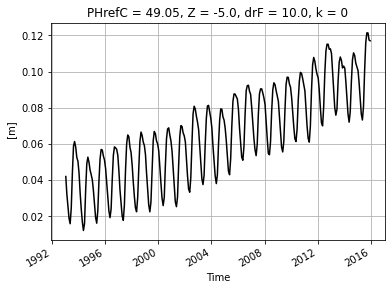

In [11]:
# and plot for fun
SSH_global_mean.plot(color='k')
plt.grid()

The resulting $SSH_{global-mean}$ `DataArray` has a single dimension, time.

#### Part 3 : Plotting the global mean sea level time series:

Let's remove the time-mean og the global mean sea level to make it global mean sea level anomaly (the absolute value has no meaning here anyway).

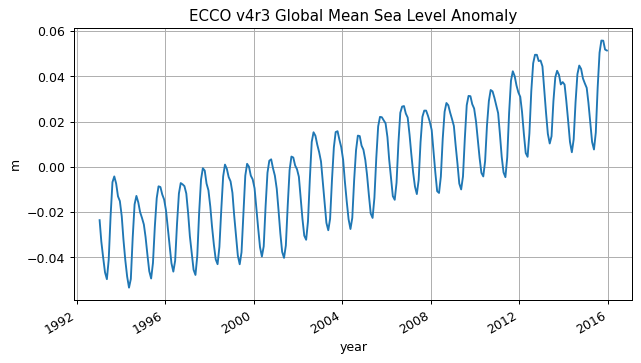

In [13]:
plt.figure(figsize=(8,4), dpi= 90)

# Method 1: .mean() method of `DataArrays`
SSH_global_mean_anomaly = SSH_global_mean - SSH_global_mean.mean()

# Method 2: numpy's `mean` method. This is just to demonstrate that we could do the same calculation using numpy, instead of xarray.
#SSH_global_mean_anomaly = SSH_global_mean - np.mean(SSH_global_mean)

SSH_global_mean_anomaly.plot()
plt.grid()
plt.title('ECCO v4r3 Global Mean Sea Level Anomaly');
plt.ylabel('m');
plt.xlabel('year');

### Mean Dynamic Topography

Mean dynamic topography (MDT) is "the difference between the time-averaged sea surface and the geoid (the equipotential surface of the Earth's gravity field that best fits the mean sea surface)" [according to NASA](https://grace.jpl.nasa.gov/data/get-data/dynamic-ocean-typography/). MDT is useful in ocean science, as it can be used to compute ocean circulation from satellite data.

MDT is calculated as follows,

$MDT(i) = \frac{\sum_{t} SSH(i,t) - SSH_{\text{global mean}}(t)}{nt} $

Where $nt$ is the number of time records. 

For *MDT* we preserve the spatial dimensions. Summation and averaging are over the time dimension.

In [14]:
# Calculate MDT according to above equation
MDT = (ecco_monthly_ds.ETAN - SSH_global_mean).mean(dim=['time'])
MDT

<xarray.DataArray (tile: 13, j: 90, i: 90)>
dask.array<mean_agg-aggregate, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
    Depth    (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XC       (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC       (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * tile     (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    rA       (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC   float32 dask.array<chunksize=(), meta=np.ndarray>
    Z        float32 dask.array<chunksize=(), meta=np.ndarray>
    drF      float32 dask.array<chunksize=(), meta=np.ndarray>
    k        int64 0

As expected, MDT has preserved its spatial dimensions: (time, j, i)

Before plotting the MDT field remove its spatial mean since its spatial mean conveys no dynamically useful information.  

In [15]:
MDT_no_spatial_mean = MDT - MDT*ecco_monthly_ds.rA/total_ocean_area
MDT_no_spatial_mean

<xarray.DataArray (tile: 13, j: 90, i: 90)>
dask.array<sub, shape=(13, 90, 90), dtype=float32, chunksize=(13, 90, 90), chunktype=numpy.ndarray>
Coordinates:
    Depth    (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XC       (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    YC       (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * tile     (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 ... 80 81 82 83 84 85 86 87 88 89
    rA       (tile, j, i) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC   float32 dask.array<chunksize=(), meta=np.ndarray>
    Z        float32 dask.array<chunksize=(), meta=np.ndarray>
    drF      float32 dask.array<chunksize=(), meta=np.ndarray>
    k        int64 0

-179.0 179.0
-180.0 180.0
-89.0 89.0
-90.0 90.0
CPU times: user 12.1 s, sys: 1.82 s, total: 14 s
Wall time: 25.4 s


Text(0.5, 1.0, 'ECCO v4r3 Mean Dynamic Topography [m]')

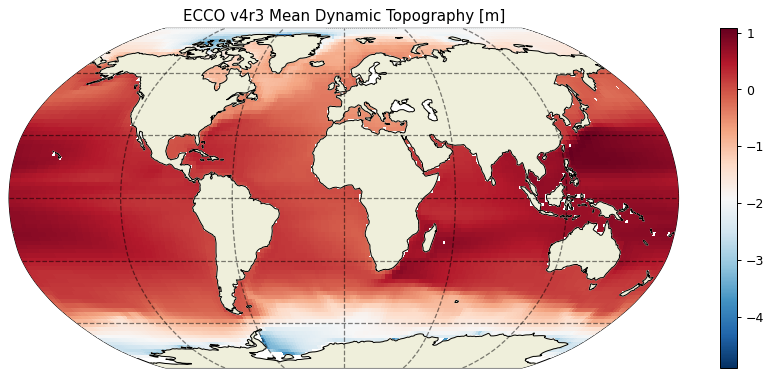

In [16]:
%%time
plt.figure(figsize=(12,5), dpi= 90)

# mask land points to Nan
MDT_no_spatial_mean = MDT_no_spatial_mean.where(ocean_mask>0)

ecco.plot_proj_to_latlon_grid(ecco_monthly_ds.XC, \
                              ecco_monthly_ds.YC, \
                              MDT_no_spatial_mean, \
                              user_lon_0=0,\
                              plot_type = 'pcolormesh', \
                              show_colorbar=True,\
                              dx=2,dy=2);

plt.title('ECCO v4r3 Mean Dynamic Topography [m]');

### Spatial variations of sea level linear trends  

To calculate the linear trend for each model point we will use on the `polyfit` function of `xarray`.  First, define a time variable in years for SSH.

In [17]:
days_since_first_record = ((ecco_monthly_ds.time - ecco_monthly_ds.time[0])/(86400e9)).astype(int).values
len(days_since_first_record)

276

Do the linear fit on the time dimension

In [18]:
ssh_fit = ecco_monthly_ds.ETAN.polyfit(dim='time',deg=1,skipna=True) # 'skipna=True' tells polyfit to skip over NaNs
ssh_fit

<xarray.Dataset>
Dimensions:               (degree: 2, i: 90, j: 90, tile: 13)
Coordinates:
  * degree                (degree) int64 1 0
  * tile                  (tile) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * j                     (j) int64 0 1 2 3 4 5 6 7 ... 82 83 84 85 86 87 88 89
  * i                     (i) int64 0 1 2 3 4 5 6 7 ... 82 83 84 85 86 87 88 89
Data variables:
    polyfit_coefficients  (degree, tile, j, i) float64 dask.array<chunksize=(2, 13, 90, 90), meta=np.ndarray>

Our time axis was in nanoseconds ($ns$), so our trend line will have a slope in $m/ns$. Let's convert that to $mm/year$.

In [19]:
ssh_trend = ssh_fit.isel(degree=0).polyfit_coefficients * 1e3 * 1e9 * 60 * 60 * 24 * 365 #convert from m/ns to mm/year

-179.5 113.5
-180.0 114.0
-89.5 89.5
-90.0 90.0
114.50770223076924 179.49230776923076
114.00001 180.0
-89.5 89.5
-90.0 90.0
CPU times: user 50.6 s, sys: 1.07 s, total: 51.6 s
Wall time: 1min 4s


Text(0.5, 1.0, 'ECCO v4r3 Sea Level Trend [mm/yr]')

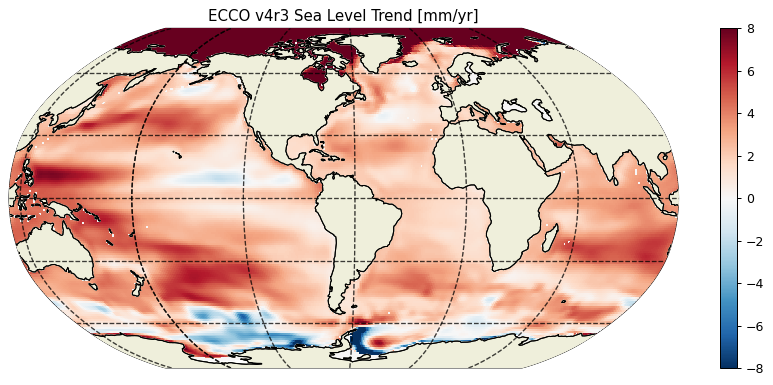

In [20]:
%%time
plt.figure(figsize=(12,5), dpi= 90)

ecco.plot_proj_to_latlon_grid(ecco_monthly_ds.XC, \
                              ecco_monthly_ds.YC, \
                              ssh_trend, \
                              user_lon_0=-66,\
                              plot_type = 'pcolormesh', \
                              show_colorbar=True,\
                              dx=1, dy=1, cmin=-8, cmax=8)

plt.title('ECCO v4r3 Sea Level Trend [mm/yr]');

And the mean rate of global sea level change in mm/year over the 1993-2018 period is:

In [21]:
((ssh_trend.where(ocean_mask>0)*ecco_monthly_ds.rA)/(ecco_monthly_ds.rA*ocean_mask).sum()).sum().values

array(3.1175273)